# <a> GAN's [Geneartor Adverserial Networks]

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

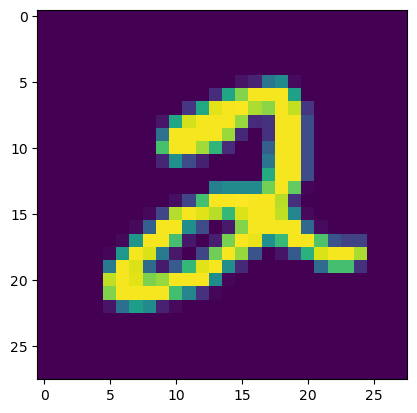

In [4]:
plt.imshow(X_train[5]);

In [5]:
y_train[5]

2

# <a> Filtering out the Data for faster training on smaller dataset

## <a> Filtering out zeros only 

In [6]:
only_zeros = X_train[y_train==0]

In [7]:
only_zeros.shape

(5923, 28, 28)

In [8]:
X_train.shape

(60000, 28, 28)

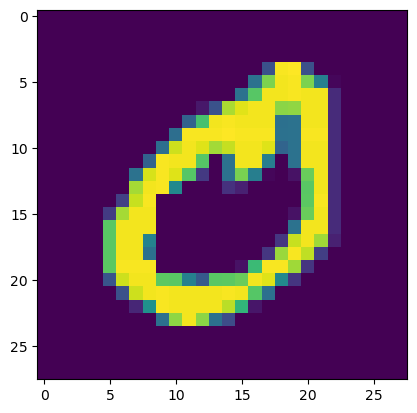

In [9]:
plt.imshow(only_zeros[1]);

----------
----------

# <a> Build GAN's

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
import tensorflow as tf

In [11]:
X_train.shape

(60000, 28, 28)

# <a> Discriminator

- First we need to flatten images from 2D to 1D
- we can add any number of hidden layers for Discriminator to be harder to fool, but in our case 2 enough
- For the final output layers. activation needs to be `Sigmoid`. because what discriminator is doing is doing binary classificastion whather image is Real or Fake
- As a result, we need to use `bnary crossentropy`

In [12]:
discriminator = Sequential()

discriminator.add(Flatten(input_shape=[28, 28]))

discriminator.add(Dense(150, activation='relu'))
discriminator.add(Dense(100, activation='relu'))

# final output layers
discriminator.add(Dense(1, activation='sigmoid'))

# compile
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

# <a> Generator

- Generator looks for middle number (in this case 30) which is lowest dimensionality. Example: 784 => 150 => [30] => 150 => 784
- Actual Generator looks a lot like Decoder Part , where takes in some sort of encoding and expanding it back out to some of output(image) trying to fool the Discriminator.
- So we have to choose codings_size and there is no right or wrong answer. It is essentially how low do we want to go down. Typically it should be a lot less than original features set.
 - if we put too small, it can't learn to start off the image.

In [13]:
tf.random.set_seed(42)

In [14]:
coding_size =100

In [15]:
# 100 => 150 => 784

generator = Sequential()

generator.add(Dense(100, activation='relu', input_shape=[coding_size]))
generator.add(Dense(150, activation='relu'))
generator.add(Dense(784, activation='relu'))

generator.add(Reshape([28, 28]))

# <a> Combine generator and discriminator as GAN's and compile

- GAN full model itself is binary classifier. that's why it uses binary_crossentrophy
- Discriminator shouldn't be trained in GAN compiling phase.

In [16]:
GAN  = Sequential([generator, discriminator])

In [17]:
discriminator.trainable = False

In [18]:
GAN.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
GAN.layers

In [20]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 28, 28)            143634    
                                                                 
 sequential (Sequential)     (None, 1)                 132951    
                                                                 
Total params: 276585 (1.06 MB)
Trainable params: 143634 (561.07 KB)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


In [21]:
GAN.layers[0].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 150)               15150     
                                                                 
 dense_5 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143634 (561.07 KB)
Trainable params: 143634 (561.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
GAN.layers[1].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 150)               117750    
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132951 (519.34 KB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 132951 (519.34 KB)
_________________________________________________________________


# <a> Setting up batchs

In [23]:
batch_size = 32

In [24]:
# data
my_data = only_zeros

# <a> Shuffle the data

In [25]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size =1000)

In [26]:
type(dataset)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

# <a> Actualy setting up batch

In [27]:
dataset = dataset.batch(batch_size =32, drop_remainder=True).prefetch(1)

In [28]:
len(my_data)/ batch_size

185.09375

# <a> Training Loops

In [29]:
[0.0] * 10

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [30]:
[[0.0]] * batch_size + [[1.0]] * batch_size

[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0],
 [1.0]]

In [31]:
epochs = 1

In [32]:
generator, discriminator = GAN.layers

In [33]:
for epoch in range(epochs):
    print(f'Currently epoch {epoch + 1}')
    
    i = 0
    
    # for every batch in dataset
    for X_batch in dataset:
        i = i+1
        
        if i%10 == 0:
            print(f'Currenty on batch number {i} of {len(my_data)//batch_size}')
            
            
        ############### 
        ## disriminator train phase
        
        # 1. create noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        # 2. Generate image noise
        gen_image = generator(noise)
        
        # 3. concat fake image vs real image
        X_fake_vs_real = tf.concat([gen_image, tf.dtypes.cast(X_batch, tf.float32)], axis =0)
        
        # 4. target label - set 0 for fake image and 1 for real image
        y1 = tf.constant([[0.0]] * batch_size + [[1.0]] * batch_size)
        
        # 5. disriminator setting True 
        discriminator.trainable = True
        
        # 6. discriminator train batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        ######################
        ## generator train phase
        
        # 1. create noise
        noise = tf.random.normal(shape=[batch_size, coding_size])
        
        # 2. we want discriminator belive that fake images or real
        y2 = tf.constant([[1.0]] * batch_size)
        
        # 3. discriminator stop
        discriminator.trainale = False
        
        # 4 . training on GAN
        GAN.train_on_batch(noise, y2)
        
print(f'Training Complete')

Currently epoch 1
Currenty on batch number 10 of 185
Currenty on batch number 20 of 185
Currenty on batch number 30 of 185
Currenty on batch number 40 of 185
Currenty on batch number 50 of 185
Currenty on batch number 60 of 185
Currenty on batch number 70 of 185
Currenty on batch number 80 of 185
Currenty on batch number 90 of 185
Currenty on batch number 100 of 185
Currenty on batch number 110 of 185
Currenty on batch number 120 of 185
Currenty on batch number 130 of 185
Currenty on batch number 140 of 185
Currenty on batch number 150 of 185
Currenty on batch number 160 of 185
Currenty on batch number 170 of 185
Currenty on batch number 180 of 185
Training Complete


# <a> Generating image after training

In [34]:
noise = tf.random.normal(shape=[10, coding_size])

In [35]:
noise.shape

TensorShape([10, 100])

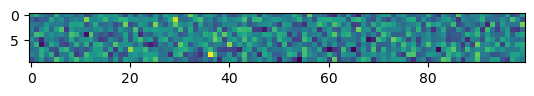

In [36]:
plt.imshow(noise)

In [37]:
images = generator(noise)

In [38]:
images.shape

TensorShape([10, 28, 28])

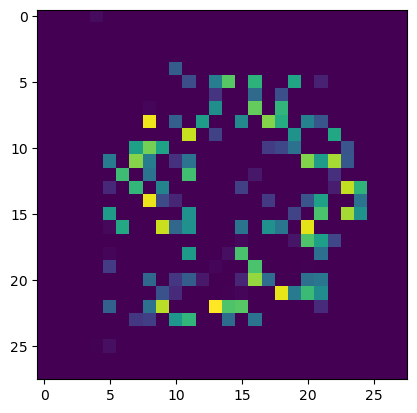

In [39]:
plt.imshow(images[3]);

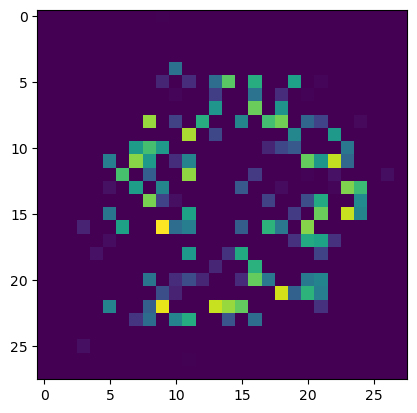

In [40]:
plt.imshow(images[1]);

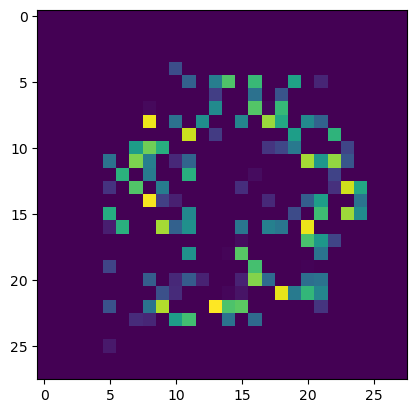

In [41]:
plt.imshow(images[7]);